In [1]:
import numpy as np
from warnings import warn
try:
    from afex import *
except ImportError as ex:
    warn('AFEX package is not installed')
    import sys
    sys.path.append('../')
    from afex import *

/Users/andruekonst/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: AFEX package is not installed
  


In [2]:
import random

seed = 12345
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [3]:
explanation_params = dict(
    use_pairwise_features=True,
    use_shortcuts_for_fnns=True,
    n_nns_per_feature=2,
    attention_type='linear_regression',
)

testing_params = {
    k: v
    for k, v in explanation_params.items()
    if k in ['use_pairwise_features', 'n_nns_per_feature']
}

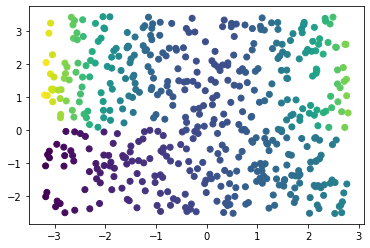

In [4]:
n_samples = 500
n_features = 2
data_params = dict(
    kind='reg_concat_square_linear',
    seed=12345,
    generator_params={}
)

train_data_gen = make_notebook_data_gen(
    n_samples,
    n_features,
    center_params=dict(
        type='random',
        std=1.0,
    ),
    **data_params
)

test_data_gen = make_notebook_data_gen(
    n_samples,
    n_features,
    center_params=dict(
        type='value',
        shift=[0.0, 2.0],
    ),
    cube_size=np.array([3, 0.5]),
    **data_params
)

test_xs, test_y, test_weights = train_data_gen()
plt.scatter(test_xs[:, 0], test_xs[:, 1], c=test_y)

In [5]:
def _make_small_nn():
    n_hidden = 4
    model = torch.nn.Sequential(
        torch.nn.Linear(1, n_hidden),
        torch.nn.Tanh(),
        torch.nn.Linear(n_hidden, n_hidden),
        torch.nn.Tanh(),
        torch.nn.Linear(n_hidden, n_hidden),
        torch.nn.Tanh(),
        torch.nn.Linear(n_hidden, n_hidden),
        torch.nn.Tanh(),
        torch.nn.Linear(n_hidden, 1)
    )
    return model

100%|██████████| 800/800 [00:06<00:00, 133.19it/s]


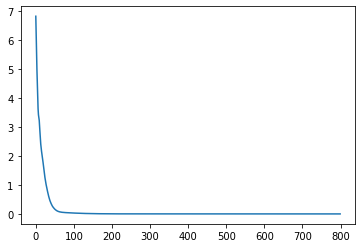

In [6]:
model = run_training(
    train_data_gen=train_data_gen,
    n_samples=n_samples,
    n_features=n_features,
    use_weights=None,
    epochs=800,
    make_feature_nn=_make_small_nn,
    attention_params=dict(add_bias=True),
    **explanation_params
)

In [7]:
figparams = dict(
    fnn_figparams=dict(
        figsize=(16, 5),
        subtract_mean=True
    ),
    pairwise_figparams=dict(
        figsize=(16, 5),
        subtract_mean=True
    )
)

Attention type: simple
Contributions:
MSE between predicted and target (real, not predicted): 7.382372e-05
Normalized abs contributions for single features:
Best feature: #0 = 0
    [0]: 1.0
    [1]: 0.0
Normalized abs contributions for pairwise features:
Best feature: #0 = (0, 1)
    [(0, 1)]: 0.0
Normalized abs contributions for common features:
Best feature: #0 = 0
    [0]: 1.0
    [(0, 1)]: 0.7514612843234033
    [1]: 0.0
MSE between unbiased predicted and target: 7.382388034529624e-05


[414.04185672574323, 0.007361499090613677]

<Figure size 432x288 with 0 Axes>

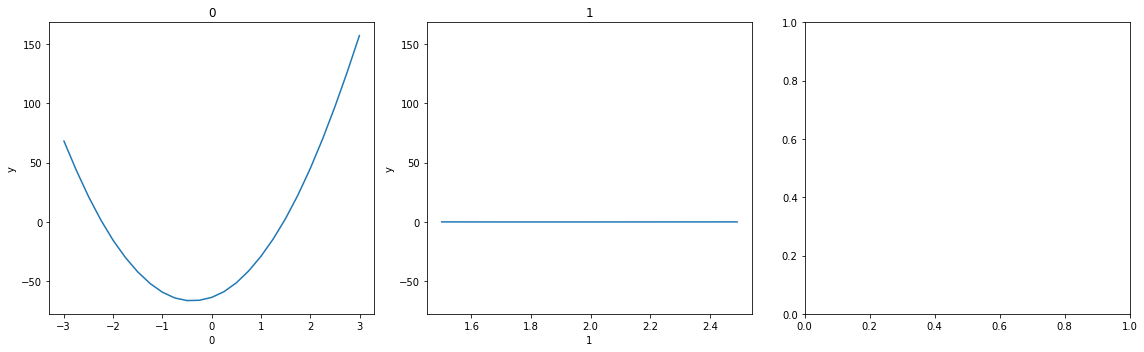

<Figure size 432x288 with 0 Axes>

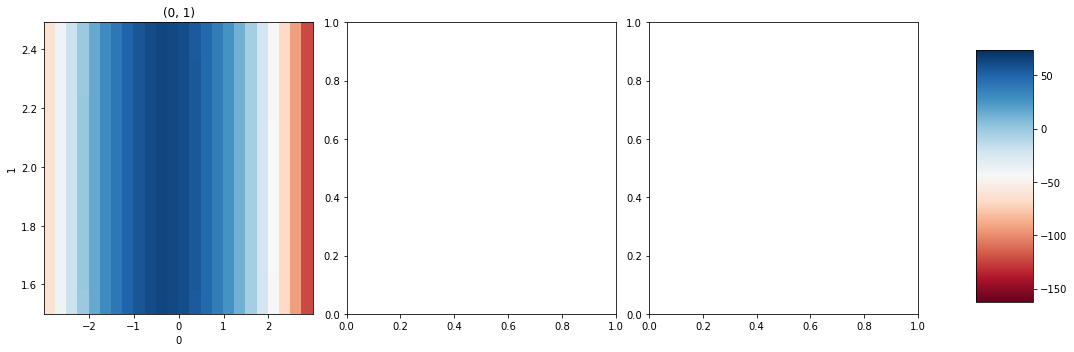

<Figure size 432x288 with 0 Axes>

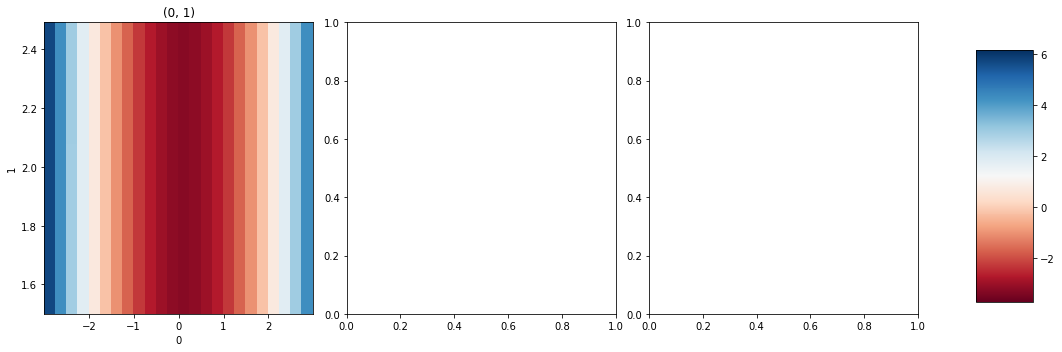

<Figure size 432x288 with 0 Axes>

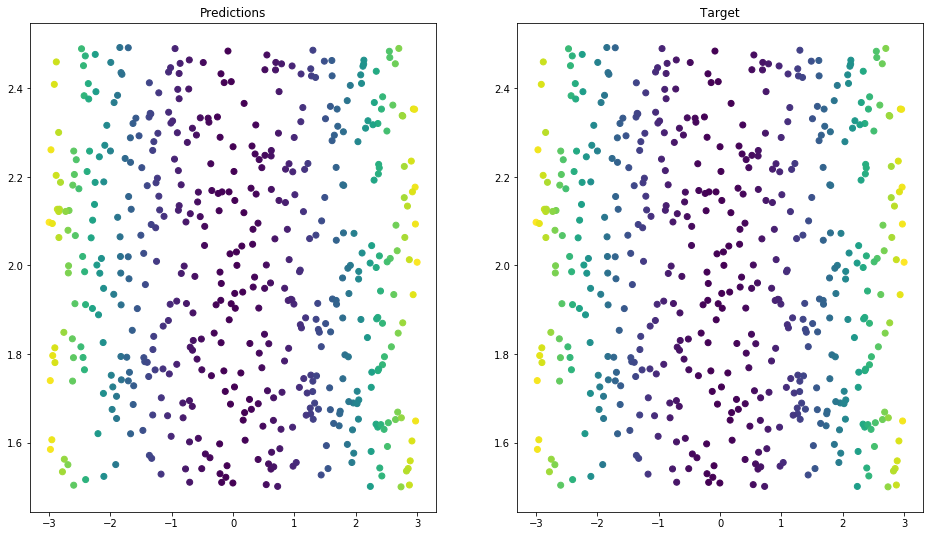

In [8]:
run_testing(
    model,
    test_data_gen=test_data_gen,
    n_features=n_features,
    grid_size=25,
    recompute_weights=False,
    **testing_params,
    **figparams
)

Attention type: simple
Contributions:
MSE between predicted and target (real, not predicted): 3.0241665e-05
Normalized abs contributions for single features:
Best feature: #0 = 0
    [0]: 1.0
    [1]: 0.0
Normalized abs contributions for pairwise features:
Best feature: #0 = (0, 1)
    [(0, 1)]: 0.0
Normalized abs contributions for common features:
Best feature: #0 = 0
    [0]: 1.0
    [(0, 1)]: 0.7933292393798218
    [1]: 0.0
MSE between unbiased predicted and target: 3.0241701170082713e-05


[15.260679440742702, 0.0035191896872113215]

<Figure size 432x288 with 0 Axes>

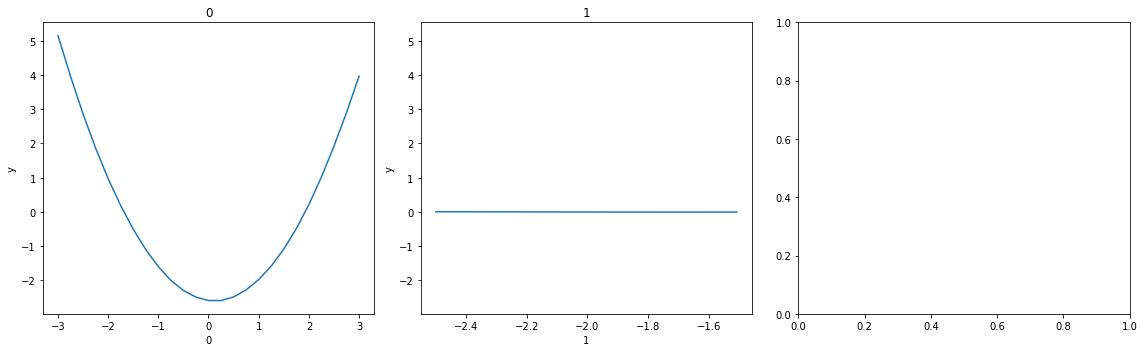

<Figure size 432x288 with 0 Axes>

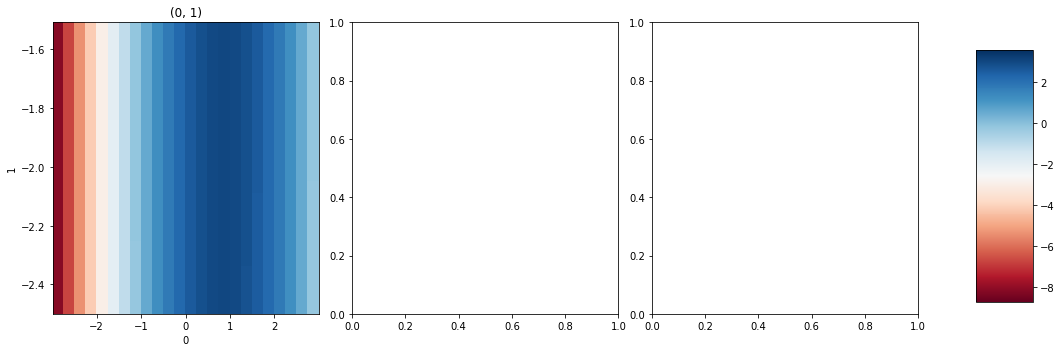

<Figure size 432x288 with 0 Axes>

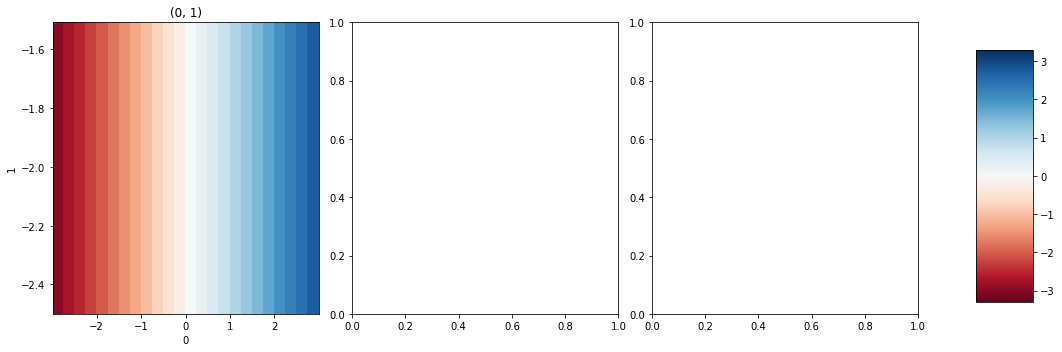

<Figure size 432x288 with 0 Axes>

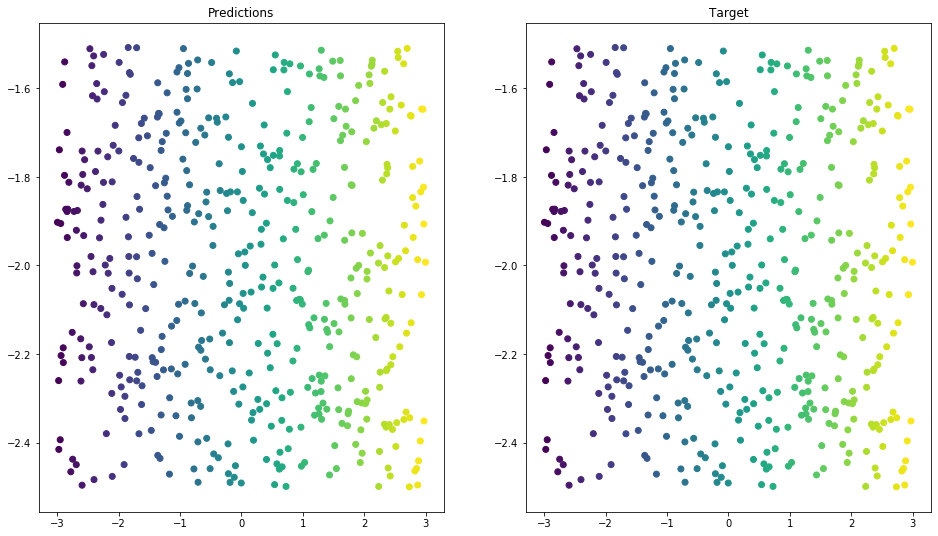

In [9]:
test_data_gen2 = make_notebook_data_gen(
    n_samples,
    n_features,
    center_params=dict(
        type='value',
        shift=[0.0, -2.0],
    ),
    cube_size=np.array([3, 0.5]),
    **data_params
)

run_testing(
    model,
    test_data_gen=test_data_gen2,
    n_features=n_features,
    grid_size=25,
    recompute_weights=False,
    **testing_params,
    **figparams
)

Attention type: simple
Contributions:
MSE between predicted and target (real, not predicted): 0.09434953
Normalized abs contributions for single features:
Best feature: #1 = 1
    [1]: 1.0
    [0]: 0.0
Normalized abs contributions for pairwise features:
Best feature: #0 = (0, 1)
    [(0, 1)]: 0.0
Normalized abs contributions for common features:
Best feature: #2 = (0, 1)
    [(0, 1)]: 1.0
    [1]: 0.9519695934061132
    [0]: 0.0
MSE between unbiased predicted and target: 0.09434953848172174


[8.988467817914495, 37.12165794139899]

<Figure size 432x288 with 0 Axes>

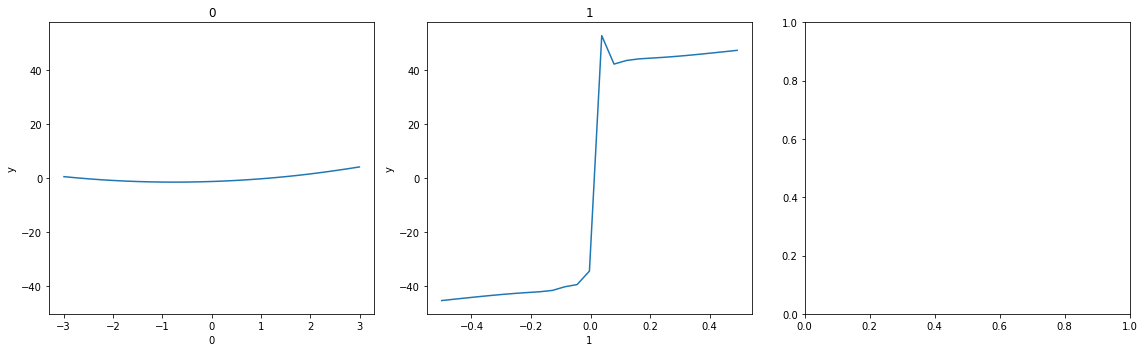

<Figure size 432x288 with 0 Axes>

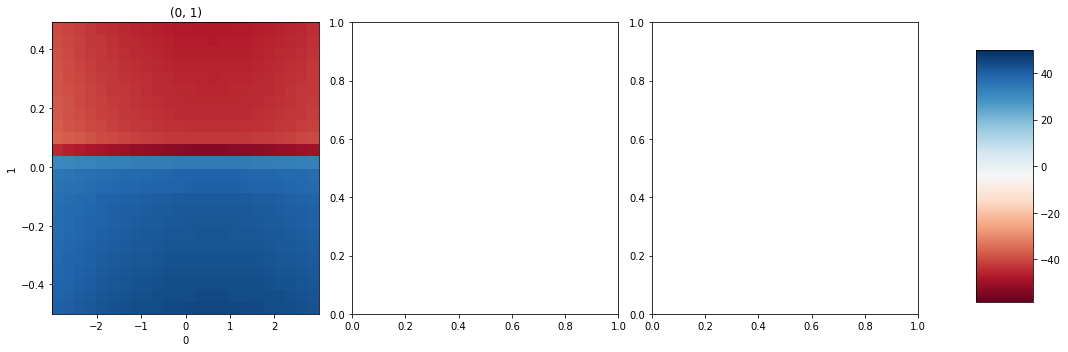

<Figure size 432x288 with 0 Axes>

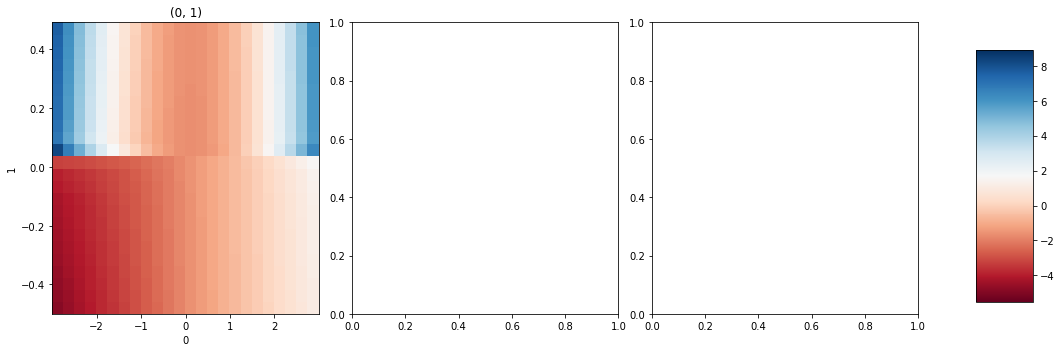

<Figure size 432x288 with 0 Axes>

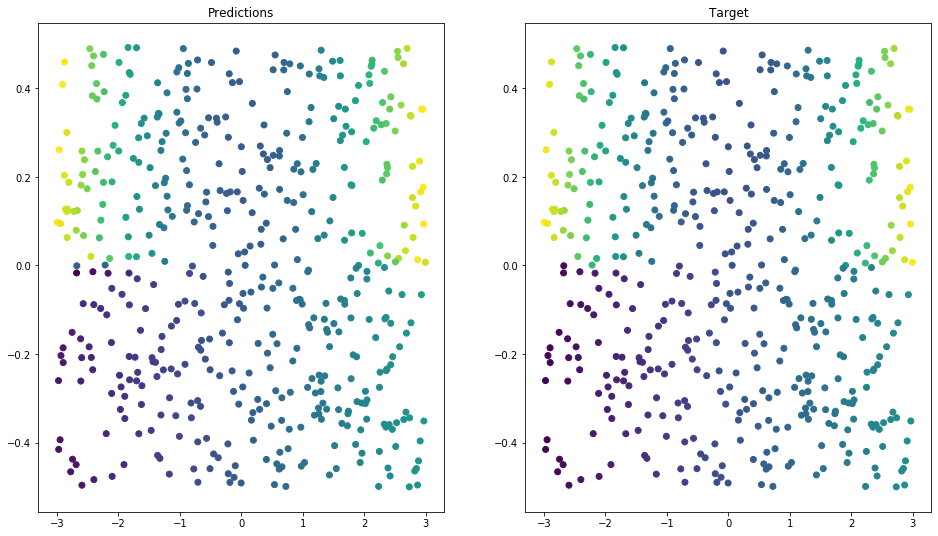

In [10]:
test_data_gen3 = make_notebook_data_gen(
    n_samples,
    n_features,
    center_params=dict(
        type='value',
        shift=[0.0, 0.0],
    ),
    cube_size=np.array([3, 0.5]),
    **data_params
)

run_testing(
    model,
    test_data_gen=test_data_gen3,
    n_features=n_features,
    grid_size=25,
    recompute_weights=False,
    **testing_params,
    **figparams
)